In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
# Define dataset directory
dataset_dir = 'data set/train'

# Define the model save path
model_save_path = 'model save/banana_classifier_vgg16.h5'

In [14]:
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Training and validation data generators
datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values to [0, 1]
    validation_split=0.2,       # Split 20% for validation
    rotation_range=20,         
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 7912 images belonging to 4 classes.
Found 1975 images belonging to 4 classes.


In [15]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# Define paths for both formats
model_save_path_keras = 'model save/banana_classifier_vgg16.keras'
model_save_path_h5 = 'model save/banana_classifier_vgg16.h5'

# Callbacks
checkpoint = ModelCheckpoint(model_save_path_keras, monitor='val_accuracy', save_best_only=True, verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint]
)

# Save the model in .h5 format manually
model.save(model_save_path_h5)
print(f"Model saved in both .keras and .h5 formats.")

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6828 - loss: 0.8426

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.66684, saving model to model save/banana_classifier_vgg16.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 2630s 11s/step - accuracy: 0.6831 - loss: 0.8418 - val_accuracy: 0.6668 - val_loss: 0.7653
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8903 - loss: 0.3549
Epoch 2: val_accuracy improved from 0.66684 to 0.73215, saving model to model save/banana_classifier_vgg16.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 2464s 10s/step - accuracy: 0.8903 - loss: 0.3548 - val_accuracy: 0.7322 - val_loss: 0.6158
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9112 - loss: 0.2735
Epoch 3: val_accuracy improved from 0.73215 to 0.77063, saving model to model save/banana_classifier_vgg16.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 2512s 10s/step - accuracy: 0.9112 - loss: 0.2734 - val_accuracy: 0.7706 - val_loss: 0.5662
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9172 - loss: 0.2460
Epoch 4: val_accuracy improved from 0.77063 to 

Model saved in both .keras and .h5 formats.


In [19]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 467s 7s/step - accuracy: 0.7845 - loss: 0.5653
Validation Accuracy: 79.39%
Validation Loss: 0.5233


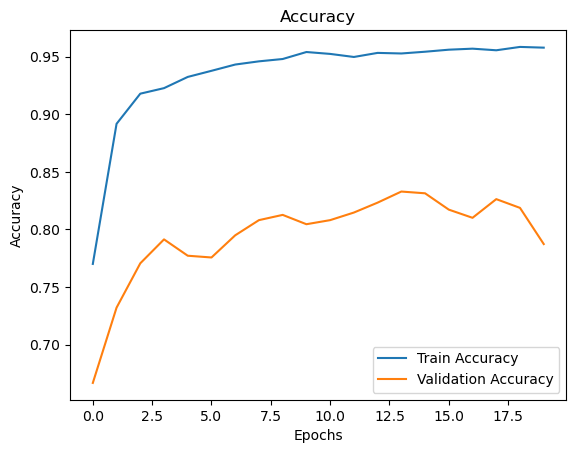

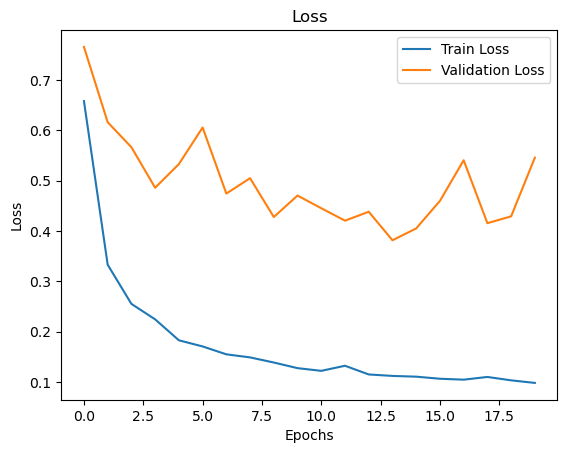

In [20]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(model_save_path)

# Test on a new image
def predict_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[class_idx]

    return predicted_class

# Example usage
image_path = 'data set/validation/Anamalu_Artificial test/image 478.jpeg'
print(f"Predicted Class: {predict_image(image_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class: Anamalu_Artificial
